In [ ]:
# IMPORTAMOS LAS LIBRERIAS
import  pandas  as  pd
import  numpy   as  np
import  matplotlib.pyplot as  plt
import  seaborn as  sns
from  datetime  import  datetime
#se importan alertas
import  warnings
#se le dice que ignore las alertas que no sean indicadas por mi
warnings.filterwarnings('ignore')

#configuracion de estilo de las graficas
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


#configuracion de pandas
pd.set_option('display.max_columns',  None)
pd.set_option('display.width',  None)
pd.set_option('display.float_format',  '{:.1f}'.format)
# # carga de documento con pandas
df_motos  = pd.read_csv('BD_Motos.csv')
df_carros  = pd.read_csv('BD_Vehiculos.csv')
print(df_carros,  df_motos)

# Mensaje de Bienvenida
print("*"*80)
print("Analisis de Datos")
print("*"*50)

print("informacion general")
print(df_motos.info(),  df_carros.info())

print("reporte descripyivo")
print(df_motos.describe,  df_carros.describe)

print("\nReporte de valores nulos")
print(df_motos.isnull().sum())
print(df_carros.isnull().sum())

print("\nReporte del porcentaje valores nulos")
print((df_motos.isnull().sum() / len(df_motos) * 100).round(2))
print((df_carros.isnull().sum() / len(df_carros) * 100).round(2))

print("\n")
print("*"*50)
print("LIMPIEZA Y TRANSFORMACION DE DATOS")
print("*"*50)
print("\n")
#cramos un acopia exacta de mi dataframe
df_cleanM  = df_motos.copy()
df_cleanC  = df_carros.copy()

print("\nNombre de las columnas")
print(df_cleanM.columns.tolist())
print(df_cleanC.columns.tolist())

#limpiamos los nombres de las columnas quitando los espacios
print("removamos los espacios al inicio y al final de la palabra")
df_cleanM.columns  = df_cleanM.columns.str.strip()
df_cleanC.columns  = df_cleanC.columns.str.strip()
print(df_cleanM.columns)
print(df_cleanC.columns)

#corregimos los errores de las columnas cambiandola de object a float64

#Motos
df_cleanM['Var 24/25']=pd.to_numeric(df_cleanM['Var 24/25'],  errors='coerce')
print(df_cleanM.dtypes)
numeric_colsM = df_cleanM.select_dtypes(include=[np.number])
print(numeric_colsM)
df_cleanM['2024']=pd.to_numeric(df_cleanM['2024'],  errors='coerce')
print(df_cleanM.dtypes)
numeric_colsM = df_cleanM.select_dtypes(include=[np.number])
print(numeric_colsM)
df_cleanM['2025']=pd.to_numeric(df_cleanM['2025'],  errors='coerce')
print(df_cleanM.dtypes)
numeric_colsM = df_cleanM.select_dtypes(include=[np.number])
print(numeric_colsM)
#Carros
df_cleanC['Var 24/25']=pd.to_numeric(df_cleanC['Var 24/25'],  errors='coerce')
print(df_cleanC.dtypes)
numeric_colsC = df_cleanC.select_dtypes(include=[np.number])
print(numeric_colsC)
df_cleanC['2024']=pd.to_numeric(df_cleanC['2024'],  errors='coerce')
print(df_cleanC.dtypes)
numeric_colsC = df_cleanC.select_dtypes(include=[np.number])
print(numeric_colsC)
df_cleanC['2025']=pd.to_numeric(df_cleanC['2025'],  errors='coerce')
print(df_cleanC.dtypes)
numeric_colsC = df_cleanC.select_dtypes(include=[np.number])
print(numeric_colsC)

#Validamos el tipo de datos de las columnas numericas
numeric_colsM = [col  for col in df_cleanM.columns if any(x in col.upper() for x in['2024', '2025', '24/25'  ])]
numeric_colsC = [col  for col in df_cleanC.columns if any(x in col.upper() for x in['2024', '2025', '24/25' ])]


#Remplazar las columnas que vengan con NaN con un cero(0), en las columnas numericas

#Motos
for col in numeric_colsM:
  if  col in  df_cleanM.columns:
    df_cleanM[col] = df_cleanM[col].fillna(0)

#Carros
for col in numeric_colsC:
  if  col in  df_cleanC.columns:
    df_cleanC[col] = df_cleanC[col].fillna(0)


print("columnas numericas encontradas Motos\n", numeric_colsM)
print("columnas numericas encontradas Carros\n", numeric_colsC)


#motos
columnsM_2024 = [col  for col in df_cleanM.columns if '2024' in col.upper()]
columnsM_2025 = [col  for col in df_cleanM.columns if '2025' in col.upper()]

print("1: ", columnsM_2024)
print("2: ", columnsM_2025)

#Carros
columnsC_2024 = [col  for col in df_cleanC.columns if '2024' in col.upper()]
columnsC_2025 = [col  for col in df_cleanC.columns if '2025' in col.upper()]

print("1: ", columnsC_2024)
print("2: ", columnsC_2025)

# MATRICULAS TOTALES
if  columnsM_2024  and columnsM_2025:
  print('--------------------Ingreso Motos')
  df_cleanM['TOTAL_MATRICULAS_MOTOS'] =df_cleanM[columnsM_2024[0]]+df_cleanM[columnsM_2025[0]]
else:
#en el caso de ue alguna de las colunmas no exista  - axis=1 toma los valores horizontales, axis=0 toma los valores verticales
  df_cleanM['TOTAL_MATRICULAS_MOTOS'] = df_cleanM[numeric_colsM].sum(axis=1)
df_cleanM.head()




                     LINEA      MARCA  2024  2025              Var 24/25
0            Corolla cross     Toyota  7517  7114  -0.053611813223360394
1                    Cx-30      Mazda  7825  6848    -0.1248562300319489
2                   Duster    Renault  6653  6128   -0.07891176912670972
3                  Picanto        Kia  5795  5645  -0.025884383088869756
4                     Onix  Chevrolet  4126  4917     0.1917111003393117
..                     ...        ...   ...   ...                    ...
995  Corvette stingray 1lt  Chevrolet     4     2                   -0.5
996     LAND CRUISER LC 79     Toyota     -     2                      -
997           DONGFENG BOX   Dongfeng     -     2                      -
998               Wrangler       Jeep     4     2                   -0.5
999                 HH1188        Jac     -     2                      -

[1000 rows x 5 columns]                    LINEA    MARCA   2024   2025             Var 24/25
0          AK125NKD EIII     

,LINEA,MARCA,2024,2025,Var 24/25,TOTAL_MATRICULAS_MOTOS
0,AK125NKD EIII,AKT,60623.0,61097.0,0.0,121720.0
1,CT100 ES SPOKE,BAJAJ,20992.0,30799.0,0.5,51791.0
2,GPD155-A (NMAX155),YAMAHA,34371.0,29852.0,-0.1,64223.0
3,CT100 KS SPOKE,BAJAJ,30573.0,28271.0,-0.1,58844.0
4,GN 125,SUZUKI,28920.0,25380.0,-0.1,54300.0


In [ ]:
#Carros
if  columnsC_2024  and columnsC_2025:

  df_cleanC['TOTAL_MATRICULAS_CARROS'] =df_cleanC[columnsC_2024[0]]+df_cleanC[columnsC_2025[0]]
else:
  df_cleanC['TOTAL_MATRICULAS_CARROS'] = df_cleanC[numeric_colsC].sum(axis=1)
df_cleanC.head()


print("\n"  + "=" * 80)
print("4. ANALISIS DESCRIPTIVO")
print("=" * 80)


4. ANALISIS DESCRIPTIVO


In [ ]:
type_col  = [col  for col in  df_cleanM.columns  if'TYPE'  in  col.upper()][0] if  any('TYPE'  in  col.upper() for col in  df_cleanM.columns) else  None
print(type_col)

None


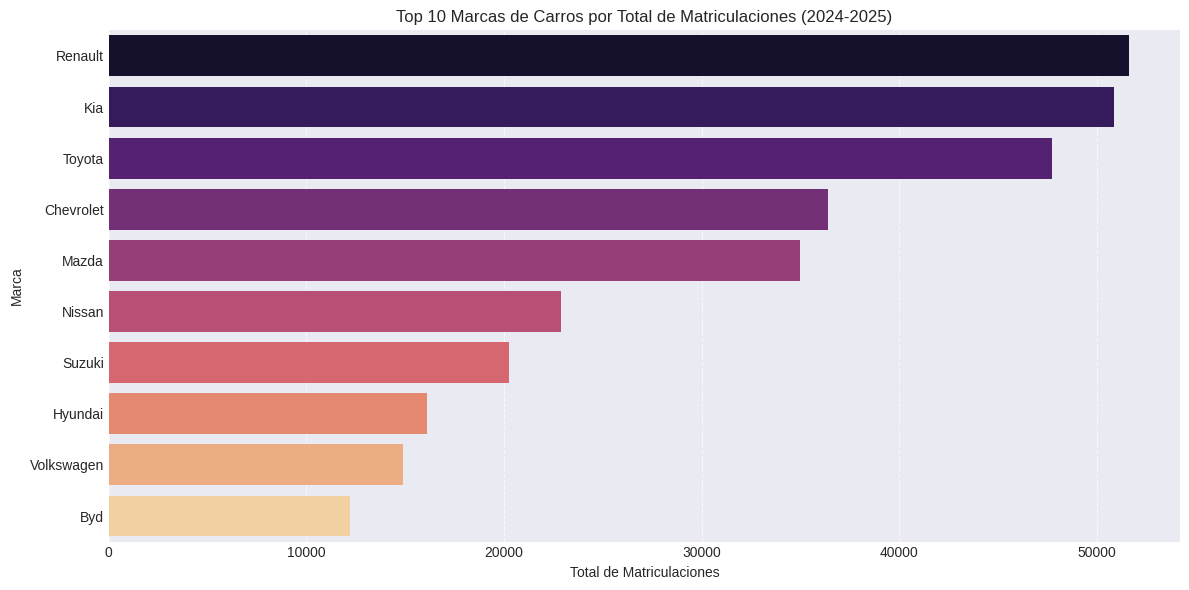

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por marca y sumar las matriculas totales de carros
carros_por_marca = df_cleanC.groupby('MARCA')['TOTAL_MATRICULAS_CARROS'].sum().sort_values(ascending=False).reset_index()

# Seleccionar las top 10 marcas para una mejor visualización
top_10_carros_por_marca = carros_por_marca.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='TOTAL_MATRICULAS_CARROS', y='MARCA', data=top_10_carros_por_marca, palette='magma')
plt.title('Top 10 Marcas de Carros por Total de Matriculaciones (2024-2025)')
plt.xlabel('Total de Matriculaciones')
plt.ylabel('Marca')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

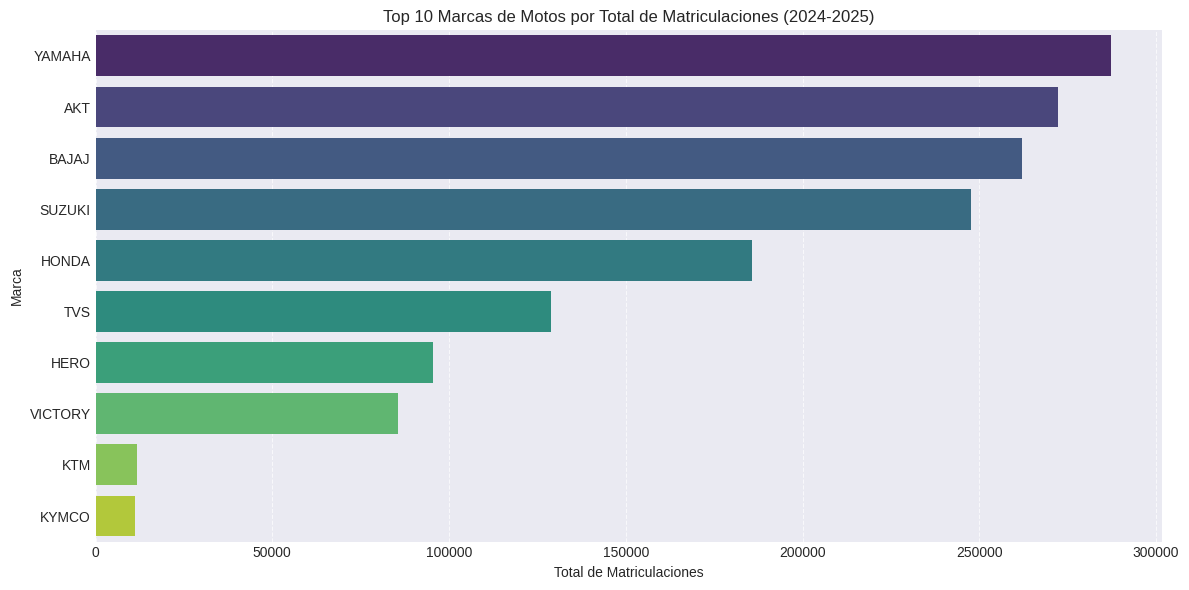

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por marca y sumar las matriculas totales de motos
motos_por_marca = df_cleanM.groupby('MARCA')['TOTAL_MATRICULAS_MOTOS'].sum().sort_values(ascending=False).reset_index()

# Seleccionar las top 10 marcas para una mejor visualización
top_10_motos_por_marca = motos_por_marca.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='TOTAL_MATRICULAS_MOTOS', y='MARCA', data=top_10_motos_por_marca, palette='viridis')
plt.title('Top 10 Marcas de Motos por Total de Matriculaciones (2024-2025)')
plt.xlabel('Total de Matriculaciones')
plt.ylabel('Marca')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

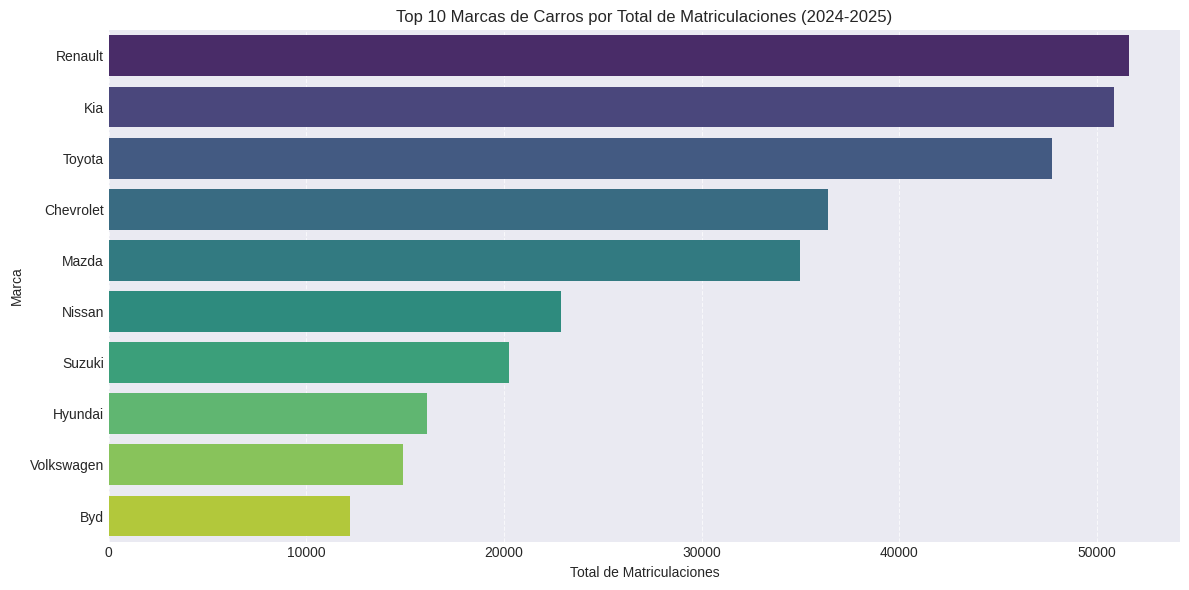

In [ ]:
# Agrupar por marca y sumar las matriculas totales de carros
carros_por_marca = df_cleanC.groupby('MARCA')['TOTAL_MATRICULAS_CARROS'].sum().sort_values(ascending=False).reset_index()

# Seleccionar las top 10 marcas para una mejor visualización
top_10_carros_por_marca = carros_por_marca.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='TOTAL_MATRICULAS_CARROS', y='MARCA', data=top_10_carros_por_marca, palette='viridis')
plt.title('Top 10 Marcas de Carros por Total de Matriculaciones (2024-2025)')
plt.xlabel('Total de Matriculaciones')
plt.ylabel('Marca')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

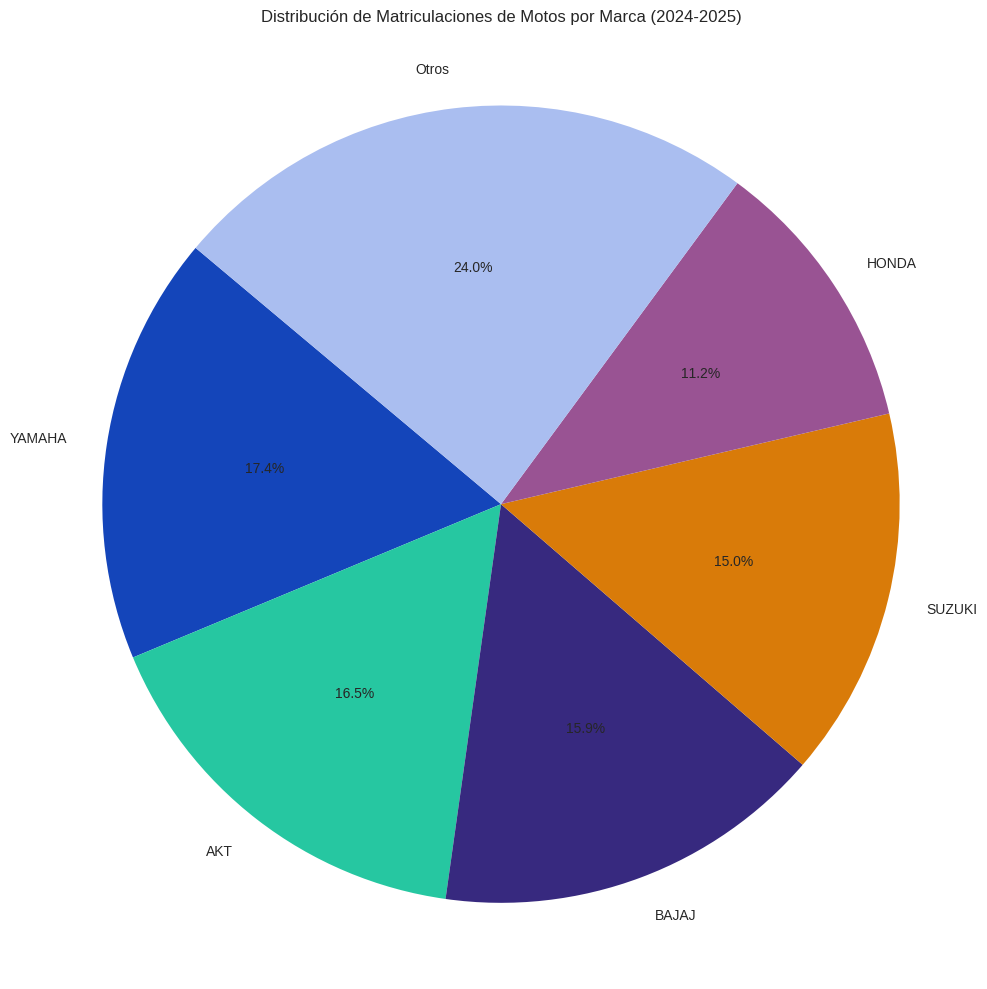

In [ ]:

import matplotlib.pyplot as plt

# Obtener los top 5 marcas y agrupar el resto como 'Otros'
colores = ['#1445BA', '#26C7A1', '#37297F', '#D97B09', '#995393', '#AABEF0']
top_5_motos = motos_por_marca.head(5)
otros_motos = pd.DataFrame({
    'MARCA': ['Otros'],
    'TOTAL_MATRICULAS_MOTOS': [motos_por_marca['TOTAL_MATRICULAS_MOTOS'].iloc[5:].sum()]
})

pie_data_motos = pd.concat([top_5_motos, otros_motos])

# Crear el gráfico de torta
plt.figure(figsize=(10, 10))
plt.pie(
    pie_data_motos['TOTAL_MATRICULAS_MOTOS'],
    labels=pie_data_motos['MARCA'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colores
)
#plt.pie(pie_data_motos['TOTAL_MATRICULAS_MOTOS'], labels=pie_data_motos['MARCA'], autopct='%1.1f%%', startangle=140, colors=plt.cm.magma(pie_data_motos['TOTAL_MATRICULAS_MOTOS']/pie_data_motos['TOTAL_MATRICULAS_MOTOS'].sum()))
plt.title('Distribución de Matriculaciones de Motos por Marca (2024-2025)')
plt.axis('equal') # Asegura que el gráfico de torta sea circular
plt.tight_layout()
plt.show()

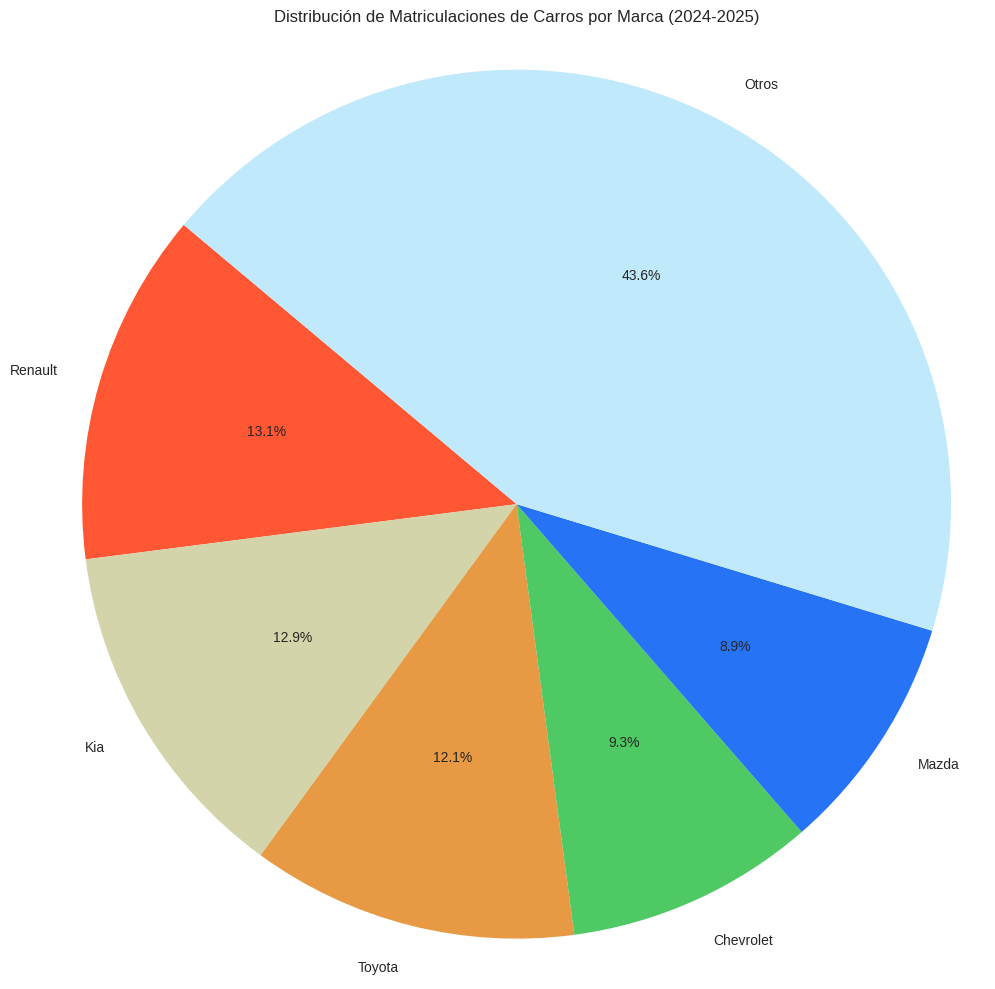

In [ ]:
import matplotlib.pyplot as plt

colores = ['#FF5733', '#D3D4A9', '#E89943', '#4FC964', '#2773F5', '#C0E9FC']
# Obtener los top 5 marcas de carros y agrupar el resto como 'Otros'
top_5_carros = carros_por_marca.head(5)
otros_carros = pd.DataFrame({
    'MARCA': ['Otros'],
    'TOTAL_MATRICULAS_CARROS': [carros_por_marca['TOTAL_MATRICULAS_CARROS'].iloc[5:].sum()]
})
pie_data_carros = pd.concat([top_5_carros, otros_carros])
plt.figure(figsize=(10, 10))
plt.pie(
    pie_data_carros['TOTAL_MATRICULAS_CARROS'],
    labels=pie_data_carros['MARCA'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colores
)
plt.title('Distribución de Matriculaciones de Carros por Marca (2024-2025)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# # Obtener los top 5 marcas de carros y agrupar el resto como 'Otros'
# top_5_carros = carros_por_marca.head(5)
# otros_carros = pd.DataFrame({
#     'MARCA': ['Otros'],
#     'TOTAL_MATRICULAS_CARROS': [carros_por_marca['TOTAL_MATRICULAS_CARROS'].iloc[5:].sum()]
# })

# pie_data_carros = pd.concat([top_5_carros, otros_carros])

# # Crear el gráfico de torta para carros
# colores = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#FFC300', '#888888']
# plt.figure(figsize=(10, 10))
# plt.pie(pie_data_carros['TOTAL_MATRICULAS_CARROS'], labels=pie_data_carros['MARCA'], autopct='%1.1f%%', startangle=140, colors=plt.cm.magma(pie_data_carros['TOTAL_MATRICULAS_CARROS']/pie_data_carros['TOTAL_MATRICULAS_CARROS'].sum()))
# plt.title('Distribución de Matriculaciones de Carros por Marca (2024-2025)')
# plt.axis('equal') # Asegura que el gráfico de torta sea circular
# plt.tight_layout()
# plt.show()

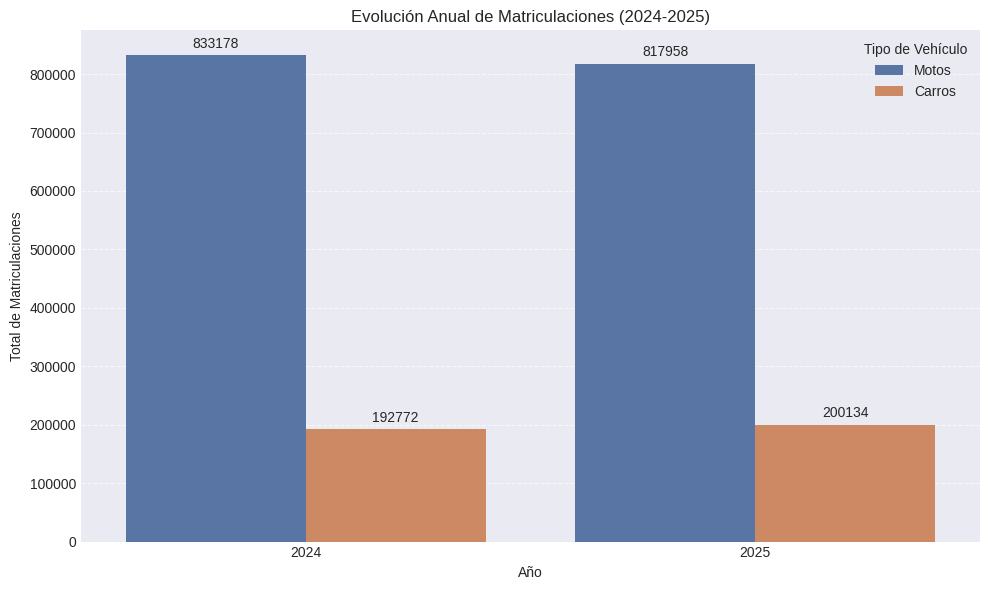

In [ ]:
# Calcular las matriculaciones totales de motos por año
total_motos_2024 = df_cleanM['2024'].sum()
total_motos_2025 = df_cleanM['2025'].sum()

# Calcular las matriculaciones totales de coches por año
total_carros_2024 = df_cleanC['2024'].sum()
total_carros_2025 = df_cleanC['2025'].sum()


# Crear un DataFrame para trazar
data = {
    'Año': [2024, 2025, 2024, 2025],
    'Tipo de Vehículo': ['Motos', 'Motos', 'Carros', 'Carros'],
    'Total Matriculaciones': [total_motos_2024, total_motos_2025, total_carros_2024, total_carros_2025]
}
df_evolution = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
# Guardamos el eje en una variable
ax = sns.barplot(
    x='Año',
    y='Total Matriculaciones',
    hue='Tipo de Vehículo',
    data=df_evolution,
    palette='deep'
)

plt.title('Evolución Anual de Matriculaciones (2024-2025)')
plt.xlabel('Año')
plt.ylabel('Total de Matriculaciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Vehículo')
plt.tight_layout()
# 🔍 Agregar etiquetas a cada barra
for cont in ax.containers:
    ax.bar_label(cont, padding=3)
plt.show()


Matriz de Correlación para Motos:


,2024,2025,Var 24/25
2024,1.0,0.9,-0.0
2025,0.9,1.0,0.1
Var 24/25,-0.0,0.1,1.0


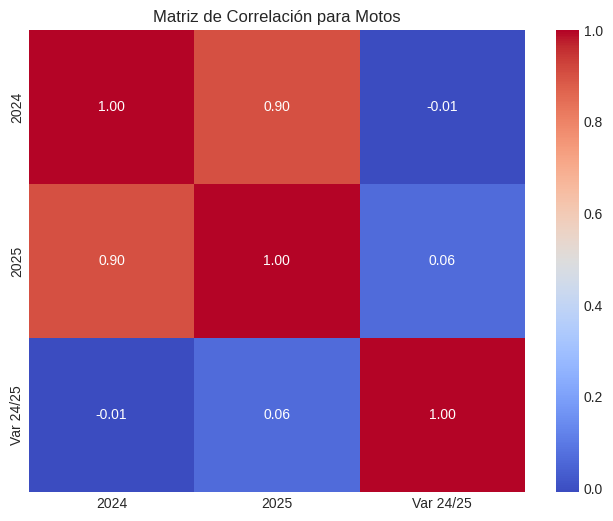

In [ ]:
# Correlacion matriz por Motos
corr_matrix_motos = df_cleanM[numeric_colsM].corr()
print("Matriz de Correlación para Motos:")
display(corr_matrix_motos)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_motos, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Motos')
plt.show()

Matriz de Correlación para Carros:


,2024,2025,Var 24/25
2024,1.0,0.9,-0.0
2025,0.9,1.0,0.1
Var 24/25,-0.0,0.1,1.0


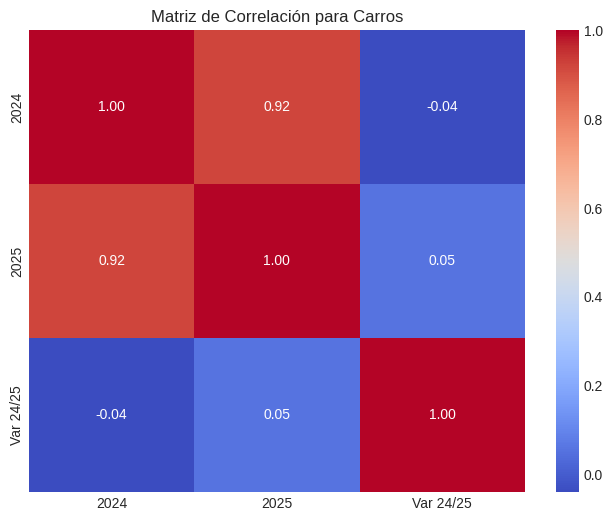

In [ ]:
# Correlacion matriz por Carros
corr_matrix_carros = df_cleanC[numeric_colsC].corr()
print("Matriz de Correlación para Carros:")
display(corr_matrix_carros)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_carros, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Carros')
plt.show()